In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pydataset import data
import scipy as sp
import sympy as sy
from scipy import linalg as la
from scipy import optimize as opt
import time

# Pandas 1

### Problem 1

In [2]:
Q1 = pd.Series([i**2 - 1 for i in np.arange(0, 51, 2)], index = np.arange(0, 51, 2))
print(Q1)
for i in Q1.index:
    if i % 3 == 0:
        Q1[i] = 0
print(Q1)

0       -1
2        3
4       15
6       35
8       63
10      99
12     143
14     195
16     255
18     323
20     399
22     483
24     575
26     675
28     783
30     899
32    1023
34    1155
36    1295
38    1443
40    1599
42    1763
44    1935
46    2115
48    2303
50    2499
dtype: int64
0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


### Problem 2

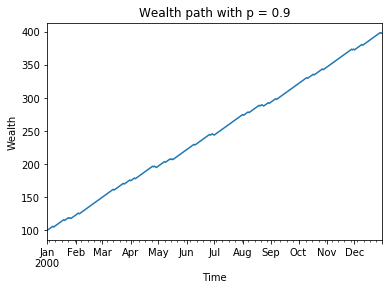

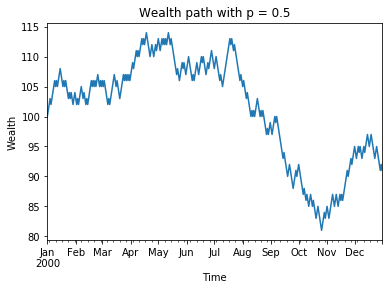

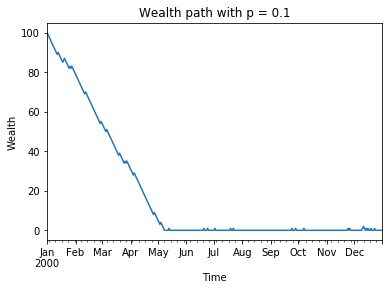

In [3]:
def Problem2(p, d = 100):
    '''
    p: probability of making money
    d: initial wealth, default = 100
    '''
    money = d
    calendar = pd.date_range('01/01/2000', '12/31/2000', freq = 'D')
    P = stats.bernoulli.rvs(p, size = 1000)
    wealthbook = pd.Series()
    wealthbook[calendar[0]] = money
    for i in range(1, len(calendar)):
        if P[i] == 1:
            wealthbook[calendar[i]] = money + 1
            money = wealthbook[calendar[i]]
        else:
            wealthbook[calendar[i]] = money - 1
            if wealthbook[calendar[i]] < 0:
                wealthbook[calendar[i]] = 0
            money = wealthbook[calendar[i]]
     
    ax = wealthbook.plot(title = 'Wealth path with p = {}'.format(p))
    ax.set(xlabel="Time", ylabel="Wealth") 
    plt.show()
    
    return None

Problem2(0.9)
Problem2(0.5)
Problem2(0.1)

### Problem 3

In [4]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Sex'] == 'M') & (studentInfo['Age'] > 19)][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [5]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, on = 'ID') \
         [['ID', 'GPA']]

,ID,GPA
0,0,3.8
1,2,3.0
2,4,2.8
3,6,3.8
4,7,3.4


# Pandas 2

### Problem 1

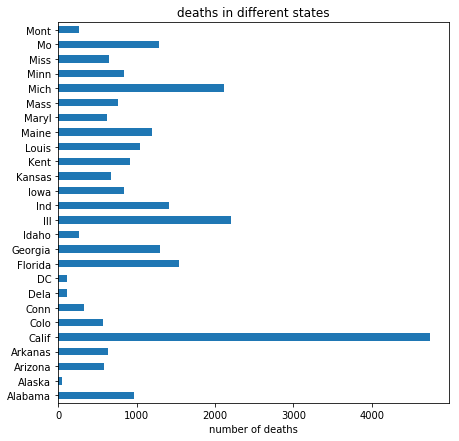

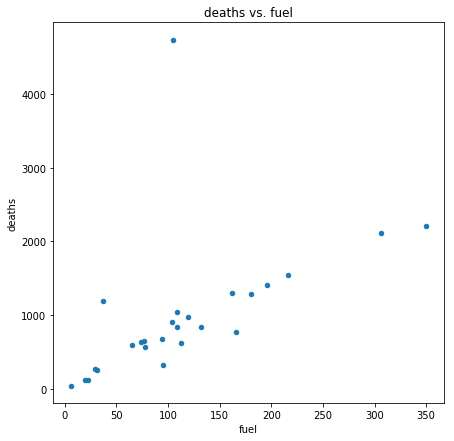

In [6]:
# To load a particular data set, enter its ID as an argument to data().
road = data("road")

# To see the information about a data set, call data() with show_doc=True.
# data("road", show_doc=True)
# road

death = road['deaths']
ax = plt.subplot(111)
ax.set_xlabel('number of deaths')
death.plot(title = 'deaths in different states', kind = 'barh', figsize = (7, 7))
plt.show()

deathfuel = road[['deaths', 'fuel']]
deathfuel.plot(title = 'deaths vs. fuel', kind = 'scatter', x = 'fuel', y = 'deaths', figsize = (7,7))
plt.show()

- California has a very high road death number
- Positive correlation between road death and fuel

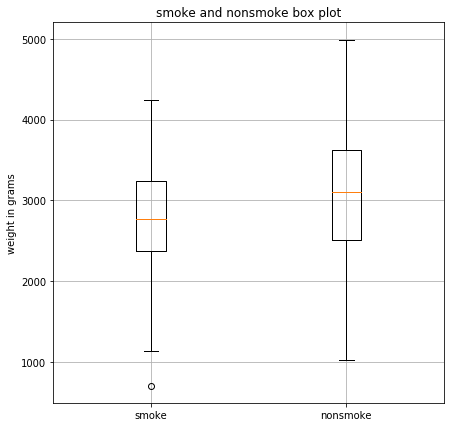

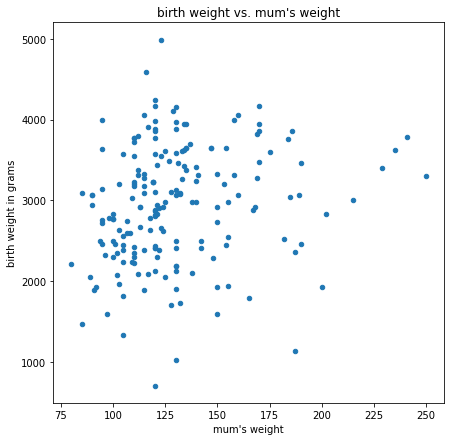

In [7]:
# To load a particular data set, enter its ID as an argument to data().
birthwt = data("birthwt")

# To see the information about a data set, call data() with show_doc=True.
# data("birthwt", show_doc=True)
# birthwt

birthwtsmoke = birthwt[birthwt['smoke'] == 1]['bwt']
birthwtnonsmoke = birthwt[birthwt['smoke'] == 0]['bwt']
plt.figure(figsize = (7, 7))
plt.title('smoke and nonsmoke box plot')
plt.ylabel('weight in grams')
plt.boxplot([birthwtsmoke, birthwtnonsmoke])
plt.xticks([1,2], ['smoke', 'nonsmoke'])
plt.grid()
plt.show()

birthwt.plot(kind = 'scatter', x = 'lwt', y = 'bwt', title = 'birth weight vs. mum\'s weight', figsize = (7,7))
plt.xlabel("mum's weight")
plt.ylabel("birth weight in grams")
plt.show()

- nonsmoke mum's gives higher mean child's birthweight, but higher spread as well.
- no clear correlation between child's birthweight and mum's weight.

# Pandas 3

### Problem 1

In [8]:
iris = data('iris')
data('iris', show_doc = True)
iris.sample(5)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
94,5.0,2.3,3.3,1.0,versicolor
61,5.0,2.0,3.5,1.0,versicolor
89,5.6,3.0,4.1,1.3,versicolor
23,4.6,3.6,1.0,0.2,setosa
139,6.0,3.0,4.8,1.8,virginica


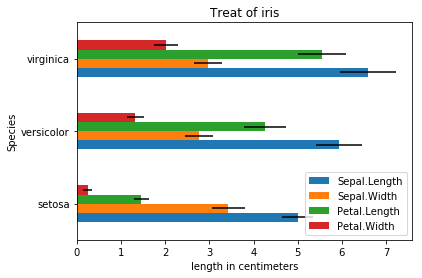

In [9]:
species = iris.groupby('Species')
species.get_group('setosa').sample(5)
species[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].mean()\
.plot(kind = 'barh', xerr = species.std(), title = 'Treat of iris')
plt.xlabel('length in centimeters')
plt.ylabel('Species')
plt.show()

- Setosa cis easiest to distinguish from the others, because it has very short Sepal length and width comparing to the other two.
- First identify whether it is sentosa, if it is not, then if it is smaller in size, then it is versicolor, if it is bigger, then it is virginica.

In [10]:
poisons = data('poisons')
data('poisons', show_doc = True)
poisons.sample(5)

poisons

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Animal Survival Times

### Description

The `poisons` data frame has 48 rows and 3 columns.

The data form a 3x4 factorial experiment, the factors being three poisons and
four treatments. Each combination of the two factors was used for four
animals, the allocation to animals having been completely randomized.

### Usage

    poisons

### Format

This data frame contains the following columns:

`time`

The survival time of the animal in units of 10 hours.

`poison`

A factor with levels `1`, `2` and `3` giving the type of poison used.

`treat`

A factor with levels `A`, `B`, `C` and `D` giving the treatment.

### Source

The data were obtained from

Box, G.E.P. and Cox, D.R. (1964) An analysis of transformations (with
Discussion). _ Journal of the Royal Statistical Society, B_, **26**, 211–252.

### References

Davison, A.C. and Hinkley, D.V. (1997) _Bootstrap Methods and Their
Applica

,time,poison,treat
13,0.82,1,B
8,0.23,2,A
23,0.38,3,B
45,0.30,3,D
21,0.30,3,B


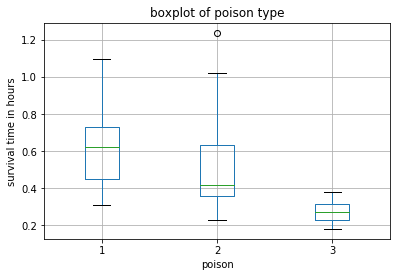

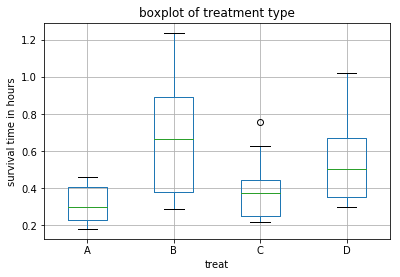

In [11]:
poison_type = poisons.groupby('poison')
treat_type = poisons.groupby('treat')
poisons.boxplot('time', by = 'poison', grid = True)
plt.ylabel('survival time in hours')
plt.title("boxplot of poison type")
plt.suptitle('')
plt.show()
poisons.boxplot('time', by = 'treat', grid = True)
plt.ylabel('survival time in hours')
plt.title("boxplot of treatment type")
plt.suptitle('')
plt.show()

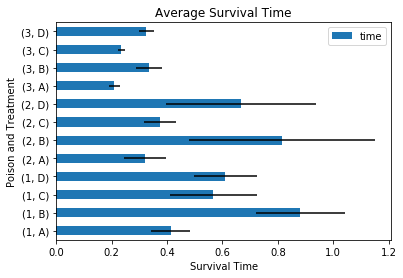

In [12]:
poison_treat = poisons.groupby(["poison", "treat"])
poison_treat[["time"]].mean().plot(kind="barh", xerr=poison_treat.std(), title="Average Survival Time")
plt.xlabel("Survival Time")
plt.ylabel("Poison and Treatment")
plt.show()

- In general, poison 3 is the most deadly, and treatment B is most effective.
- If I do not know the poison type, then I will go for treatment B. Even if I know the poison types, I will choose treatment B for poison 1 and 2, and perhaps for 3 as well, because for poison 3, treatment B has a higher mean suvival time than treatment D but also a higher spread than D, so it is not quite clear whether B or D is better

In [13]:
diamonds = data('diamonds')
data('diamonds', show_doc = True)
diamonds.sample(5)

diamonds

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Prices of 50,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

### Usage

    data(diamonds)

### Format

A data frame with 53940 rows and 10 variables

### Details

  * price. price in US dollars (\$326–\$18,823) 

  * carat. weight of the diamond (0.2–5.01) 

  * cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

  * colour. diamond colour, from J (worst) to D (best) 

  * clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) 

  * x. length in mm (0–10.74) 

  * y. width in mm (0–58.9) 

  * z. depth in mm (0–31.8) 

  * depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) 

  * table. width of top of diamond relative to widest point (43–95) 




,carat,cut,color,clarity,depth,table,price,x,y,z
10538,1.01,Good,E,SI2,58.5,61.0,4807,6.51,6.61,3.84
42906,0.50,Good,H,VVS2,61.9,64.3,1362,5.01,5.03,3.11
31508,0.34,Premium,G,VS2,62.0,59.0,765,4.47,4.43,2.76
32502,0.32,Very Good,F,VS1,60.0,62.0,798,4.44,4.49,2.68
11346,1.01,Premium,F,SI1,62.5,58.0,4989,6.42,6.39,4.00


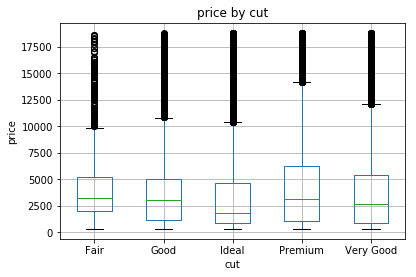

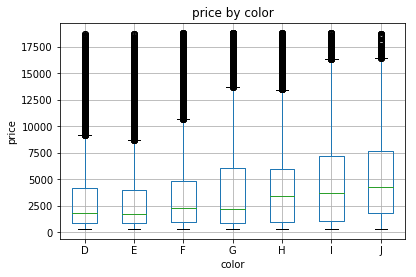

In [14]:
cut = diamonds.groupby('cut')
diamonds.boxplot('price', by = 'cut')
plt.suptitle('')
plt.title('price by cut')
plt.ylabel('price')
plt.show()

diamonds.boxplot('price', by = 'color')
plt.suptitle('')
plt.title('price by color')
plt.ylabel('price')
plt.show()

- The prices are quit similar for differet cuts. It seems unreasonable that fair cut diamonds has a mean price much higher than ideal cut ones, but if we consider for the outliers, we may know that only controlling for cut is very inaccurate. For example, a fair cut diamond may have large size or better color etc.
- A diamond with high alphebat color is priced color. Again, the outliers suggests that it is not accurate to only consider colors.
- It can be explained as there are too many other factors that are affecting the price and hence the result is very inaccurate.

### Problem 2

In [15]:
embarked = pd.read_csv('Titanic.csv')
embarked.sample(5)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
232,1.0,0.0,"Porter, Mr. Walter Chamberlain",male,47.0,0.0,0.0,110465,52.0000,C110,S,NaN,207.0,"Worcester, MA"
18,1.0,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,11813,76.2917,D15,C,8,NaN,NaN
662,3.0,0.0,"Badt, Mr. Mohamed",male,40.0,0.0,0.0,2623,7.2250,NaN,C,NaN,NaN,NaN
1261,3.0,1.0,"Turkula, Mrs. (Hedwig)",female,63.0,0.0,0.0,4134,9.5875,NaN,S,15,NaN,NaN
1273,3.0,0.0,"Vander Planke, Miss. Augusta Maria",female,18.0,2.0,0.0,345764,18.0000,NaN,S,NaN,NaN,NaN


In [16]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', aggfunc = 'mean')

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


In [17]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', columns = 'Sex', aggfunc = 'mean')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


In [18]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', aggfunc = 'count')

,Survived
Embarked,
C,270
Q,123
S,914


- People who embarked at C have a much higher survival rate than those from Q and S.
- Males embarked from all 3 places have lower survival rate than females.
- It is weird that people embarked from C has a much higher survival rate than the other 2 places, and this is not due to small sample size. So it is likely to have other factors affecting the survival rate.

In [19]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', columns = 'Pclass', aggfunc = 'mean')

Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210101


In [20]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', columns = 'Pclass', aggfunc = 'count')

Pclass,1.0,2.0,3.0
Embarked,,,
C,141,28,101
Q,3,7,113
S,177,242,495


In [21]:
age = pd.cut(embarked['Age'], [0, 15, 40, 100])
embarked.pivot_table(values = 'Survived', index = age, columns = "Embarked", aggfunc = 'mean')

Embarked,C,Q,S
Age,,,
"(0, 15]",0.791667,0.166667,0.541176
"(15, 40]",0.590551,0.324324,0.339518
"(40, 100]",0.622951,0.000000,0.322785


In [22]:
embarked.pivot_table(values = 'Survived', index = age, columns = "Embarked", aggfunc = 'count')

Embarked,C,Q,S
Age,,,
"(0, 15]",24,6,85
"(15, 40]",127,37,539
"(40, 100]",61,7,158


- People embarked from C still has a much higher survival rate, I think it is due to that people from C has a much higher proportion in the first class.

# Pandas 4

### Problem 1

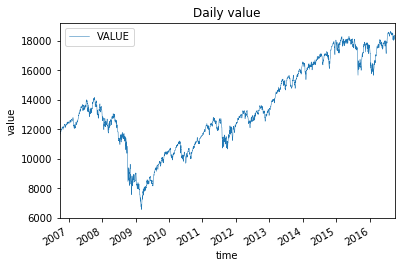

In [23]:
DJIA = pd.read_csv('DJIA.csv')
DJIA.index = pd.to_datetime(DJIA['DATE'])
DJIA = DJIA[DJIA['VALUE'] != '.']
DJIA = DJIA.drop(columns = 'DATE')
DJIA['VALUE'] = DJIA['VALUE'].astype(float)
DJIA.plot(lw = 0.5)
plt.title('Daily value')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

### Problem 2

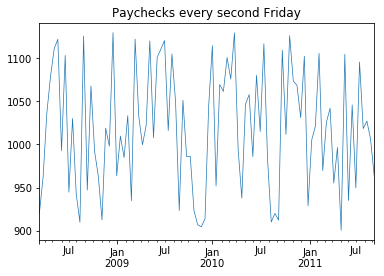

In [24]:
paychecks = pd.read_csv('paychecks.csv')
paychecks.sample(5)
paychecks.index = pd.date_range(start = '03/13/2008', periods = 92, freq = '2W-FRI')
paychecks.plot(lw = 0.7, legend = False)
plt.title('Paychecks every second Friday')
plt.show()

### Problem 5

In [25]:
DJIA
onedaychange = DJIA - DJIA.shift(1)
print(onedaychange.idxmax()[0], ' has maximum gain ', onedaychange.max()[0])

2008-10-13 00:00:00  has maximum gain  936.4200000000001


In [26]:
print(onedaychange.idxmin()[0], ' has maximum loss ', onedaychange.min()[0])

2008-09-29 00:00:00  has maximum loss  -777.6799999999985


In [27]:
DJIAmonthstart = DJIA.resample('M').first()
DJIAmonthend = DJIA.resample('M').last()

In [28]:
monthchange = DJIAmonthend - DJIAmonthstart
print(monthchange.idxmax()[0], ' has maximum gain ', monthchange.max()[0])

2015-10-31 00:00:00  has maximum gain  1391.5300000000007


In [29]:
print(monthchange.idxmin()[0], ' has maximum loss ', monthchange.min()[0])

2008-10-31 00:00:00  has maximum loss  -1506.0599999999995


### Problem 6

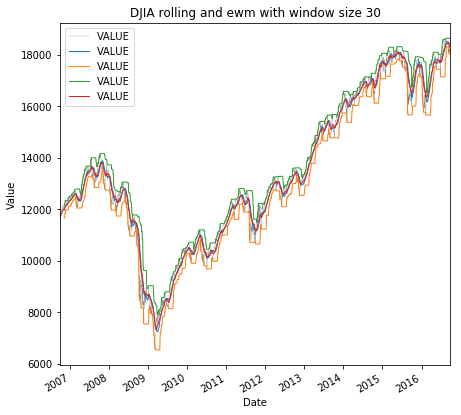

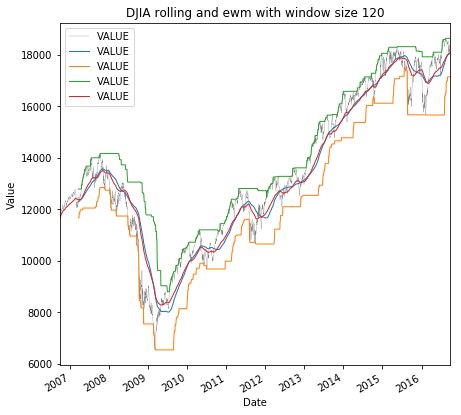

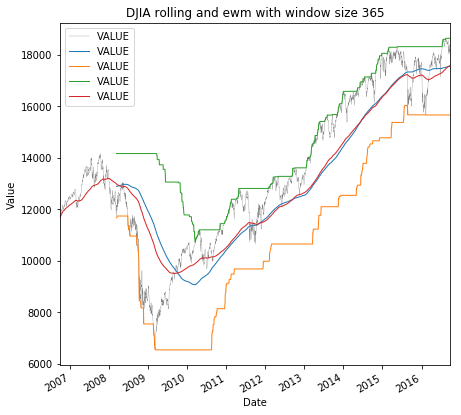

In [30]:
def rolling_ewm(data, dataname, size):
    
    fig, ax = plt.subplots(figsize = (7,7))
    data.plot(color="gray", lw=.3, ax = ax)
    data.rolling(window = size).mean().plot(label = 'rolling average', lw=1, ax = ax)
    data.rolling(window = size).min().plot(label = 'rolling minimum', lw=1, ax = ax)
    data.rolling(window = size).max().plot(label = 'rolling maximum', lw=1, ax = ax)
    data.ewm(span = size).mean().plot(label = 'EWMA', lw=1, ax = ax)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('{} rolling and ewm with window size {}'.format(dataname, size))
    plt.show()
    
rolling_ewm(DJIA, 'DJIA', 30)
rolling_ewm(DJIA, 'DJIA', 120)
rolling_ewm(DJIA, 'DJIA', 365)

# Conditioning and stability

### Problem 1

In [31]:
def condition(A):
    
    if np.abs(np.min(sp.linalg.svd(A)[1]) - 0) > 1e-6:
        κ = np.max(sp.linalg.svd(A)[1])/np.min(sp.linalg.svd(A)[1])
    else:
        κ = np.inf
        
    return κ

In [32]:
A = np.array([[1, 4], [5, 44]])
condition(A)

82.40453141168874

In [33]:
np.linalg.cond(A)

82.40453141168871

In [34]:
B = sp.linalg.qr(A)[0]
condition(B)

1.0

### Problem 2

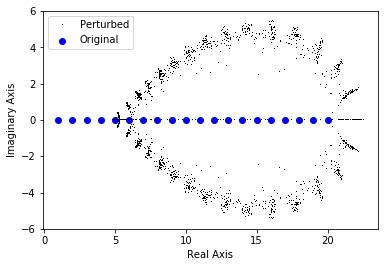

(3.53519354517049e-19, 0.243994811900774)

In [35]:
def Problem2(N = 100):

    # The roots of w are 1, 2, ..., 20.
    w_roots = np.arange(1, 21)
    sorted_w_roots = np.sort(w_roots)
    
    # Get the exact Wilkinson polynomial coefficients using SymPy.
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    plt.figure()
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.scatter(w_roots, np.zeros(20), color = 'blue', label = 'Original')
    im = []
    re = []
    abs_klist = []
    rela_klist = []
    for i in range(N):
        np.random.seed(i*10000000)
        r = np.random.normal(1, 10**(-10), 21)
        
        # Perturb coefficients
        new_coeffs = np.zeros_like(w_coeffs)
        h = w_coeffs - new_coeffs
        
        for i in range(21):
            new_coeffs[i] = w_coeffs[i] * r[i]

        new_roots = np.roots(np.poly1d(new_coeffs))
        sorted_new_roots = np.sort(new_roots)
        # compute the condition number
        abs_k = np.linalg.norm(sorted_new_roots - sorted_w_roots, np.inf)/np.linalg.norm(h, np.inf)
        rela_k = abs_k * np.linalg.norm(w_coeffs, np.inf)/np.linalg.norm(sorted_w_roots, np.inf)
        
        abs_klist.append(abs_k)
        rela_klist.append(rela_k)
        
        # take the im part and re part
        for root in new_roots:
            im.append(root.imag)
            re.append(root.real)
    plt.plot(re, im, 'k,', label = 'Perturbed')
    plt.legend()
    plt.show()
    
    absolute_k = np.mean(abs_klist)
    relative_k = np.mean(rela_klist)
    
    return absolute_k, relative_k
    
    
Problem2() # graph is correct, but condition number is wrong= =

### Problem 3

In [36]:
def condition_eigenvalue(A):
    H = np.zeros_like(A)
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    perturb_A = A + H
    
    λ = sp.linalg.eigvals(A)
    perturb_λ = sp.linalg.eigvals(perturb_A)
    
    κ = np.linalg.norm(λ - perturb_λ, 2)/np.linalg.norm(H,2)
    relative_κ = np.linalg.norm(A, 2)/np.linalg.norm(λ, 2) * κ
    
    return κ, relative_κ

condition_eigenvalue(A)

(0.83167114760727, 0.8318202111715692)

### Problem 4

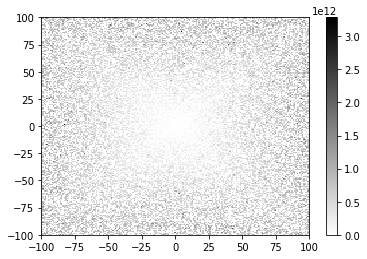

In [37]:
def condition_plot(xmin, xmax, ymin, ymax, res):
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    κ = np.zeros((res, res))
    
    for i in range(res):
        for j in range(res):
            A = np.array([[1, x[i]], [y[j], 1]])
        
            κ[i, j] = condition_eigenvalue(A)[1]
    
    xx, yy = np.meshgrid(x, y)   
    plt.pcolormesh(xx, yy, κ, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
    
condition_plot(-100, 100, -100, 100, 200)

### Problem 5

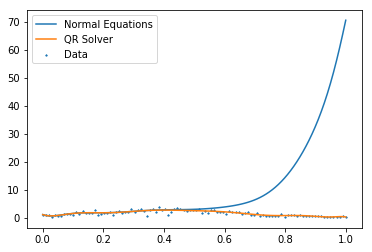

(182.47535246459793, 4.5933895239657)

In [39]:
def stable_plot(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    AT = A.T
    
    # inverse
    coeff1 = la.inv(AT @ A) @ AT @ yk
    
    # QR
    Q, R = la.qr(A, mode = 'economic')
    coeff2 = la.solve_triangular(R, Q.T.dot(yk))
    
    xx = np.linspace(0, 1, 100)
    inv = np.polyval(coeff1, xx)
    qr = np.polyval(coeff2, xx)
    
    plt.figure()
    plt.plot(xx, inv, label = 'Normal Equations')
    plt.plot(xx, qr, label = 'QR Solver')
    plt.scatter(xk, yk, marker = '*', s = 2, label = 'Data')
    plt.legend()
    plt.show()
    
    forward_error_inv = la.norm(A @ coeff1 - yk, 2)
    forward_error_qr = la.norm(A @ coeff2 - yk, 2)
    
    return (forward_error_inv, forward_error_qr)
    
stable_plot(13)

### Problem 6

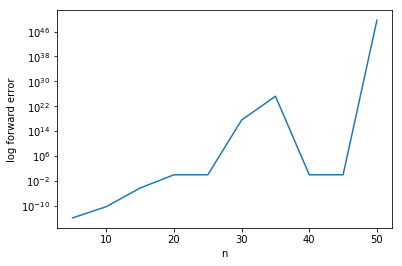

In [40]:
def true_integral(n):
    
    x = sy.symbols('x')
    integral = sy.integrate(((x ** n) * sy.exp(x - 1)), (x, 0, 1))
    
    return integral

def approx_integral(n):
    
    n = int(n)
    subfac = sy.subfactorial(n)
    fac = sy.factorial(n)
    
    integral = (-1)**n * subfac + (-1)**(n+1) * fac / np.exp(1)
    
    return integral

def integral_stability():
    
    n = np.arange(5, 51, 5)
    error_list = []
    
    for i in range(10):
        true = true_integral(n[i])
        approx = approx_integral(n[i])
        error = np.abs(true - approx)/np.abs(true)
        error_list.append(error)
        
    plt.plot(n, error_list)
    plt.yscale('log')
    plt.ylabel('log forward error')
    plt.xlabel('n')
    plt.show()
    
integral_stability()

- The algorithm is very unstable when n gets large, the reason is that when n gets large, n factorial and n subfactorial is very near to each other and results in significant calcellation.

# Iterative solvers

### Problem 1 and 2

Iteration 1 with difference 0.83507198673512
Iteration 11 with difference 0.00013510833110527698


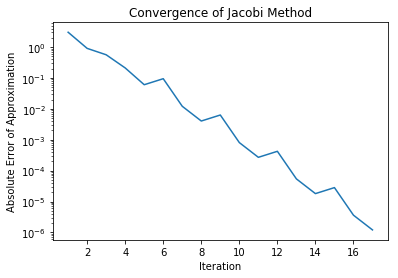

(array([[-0.30826093],
        [ 0.39349306],
        [-0.04530741],
        [ 0.83507199],
        [-0.18107571],
        [-0.00435397],
        [ 0.3929708 ],
        [ 0.0510705 ],
        [ 0.60604398],
        [-0.0342633 ]]), True)

In [41]:
def Jacobi(A, b, tol = 1e-6, maxiters = 500, plot = False):
    
    b = b.reshape(len(b), 1)
    D = np.diag(A)
    Dinv = (1/D).reshape(b.shape)

    x = np.zeros_like(b)
    abserror = []
    
    for i in range(maxiters):
        xp = x + np.multiply(Dinv, (b - np.dot(A, x)))
        diff = la.norm(xp - x, np.inf)
        if i % 10 == 0:
            print('Iteration {} with difference {}'.format(i+1, diff))
        x = xp
        abserror.append(la.norm(A@x - b, np.inf))
        if diff < tol:
            break
    if plot:
        plt.semilogy(np.arange(1, i+2, 1), abserror)
        plt.title('Convergence of Jacobi Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    robust = np.allclose(A @ x, b)
        
    return x, robust

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

Jacobi(diag_dom(10), np.random.random(10), plot = True)

### Problem 3

Iteration 1 with difference 0.35350374874591806
Iteration 11 with difference 0.0006923340886856311
Iteration 21 with difference 5.300450650447264e-06


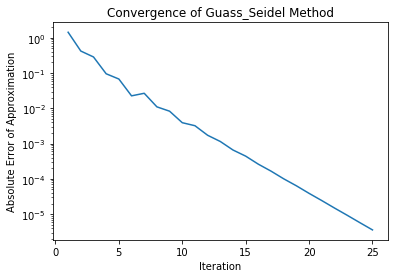

array([[ 0.17987193],
       [ 0.04891735],
       [ 0.22776928],
       [ 0.35350375],
       [ 0.15688334],
       [ 0.18943147],
       [ 0.14176283],
       [ 0.09868616],
       [-0.062988  ],
       [ 0.07722985]])

In [42]:
def Guass_Seidel(A, b, tol = 1e-6, maxiter = 500, plot = False):
    
    b = b.reshape(len(b), 1)
    x = np.zeros_like(b)
    xp = np.zeros_like(b)
    abserror = []
    
    for i in range(maxiter):
        for j in range(len(A)):
            xp[j, :] = x[j, :] + 1/A[j, j] * (b[j, :] - A[j, :] @ x)
        
        diff = la.norm(xp - x, np.inf)
        x = xp.copy()
        abserror.append(la.norm(A@x - b, np.inf))
        if i % 10 == 0:
            print('Iteration {} with difference {}'.format(i+1, diff))
        
        if diff < tol:
            break
            
    if plot:
        plt.semilogy(np.arange(1, i+2, 1), abserror)
        plt.title('Convergence of Guass_Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    robust = np.allclose(A @ x, b)
        
    return x

Guass_Seidel(diag_dom(10), np.random.random(10), plot = True)

### Problem 4

In [43]:
def GS_sparse(A, b, tol = 1e-6, maxiter = 1000, plot = False):
    
    b = b.reshape(len(b), 1)
    x = np.zeros_like(b)
    xp = np.zeros_like(b)
    abserror = []
    
    for i in range(maxiter):
        for j in range(len(b)):
            # deal with sparse matrix
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            Aix = A.data[rowstart: rowend] @ x[A.indices[rowstart: rowend]]
            xp[j, :] = x[j, :] + 1/A[j, j] * (b[j, :] - Aix)
        
        diff = la.norm(xp - x, np.inf)
        x = xp.copy()
        abserror.append(la.norm(A@x - b, np.inf))
        if plot:
            if i % 10 == 0:
                print('Iteration {} with difference {}'.format(i+1, diff))
        
        if diff < tol:
            break
            
    if plot:
        plt.semilogy(np.arange(1, i+2, 1), abserror)
        plt.title('Convergence of Guass_Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    robust = np.allclose(A @ x, b)
        
    return x

In [44]:
C = sp.sparse.csr_matrix(diag_dom(50000))

Iteration 1 with difference 0.002949106967664493


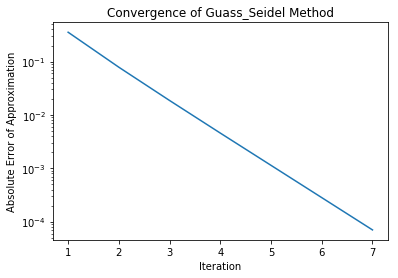

array([[0.00066212],
       [0.0015716 ],
       [0.00132352],
       ...,
       [0.00046111],
       [0.00215409],
       [0.0018667 ]])

In [45]:
GS_sparse(C, np.random.random(50000), plot = True)

### Problem 5

In [46]:
def SOR_sparse(A, b, tol = 1e-6, ω = 1, maxiter = 1000, plot = False):
    
    b = b.reshape(len(b), 1)
    x = np.zeros_like(b)
    xp = np.zeros_like(b)
    abserror = []
    
    for i in range(maxiter):
        for j in range(len(b)):
            # deal with sparse matrix
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            Ai = A.data[rowstart: rowend].reshape(1, len(A.indices[rowstart: rowend]))
            Aix = Ai @ x[A.indices[rowstart: rowend]]
            xp[j, :] = x[j, :] + (ω/A[j, j]) * (b[j, :] - Aix)
        
        diff = la.norm(xp - x, np.inf)
        x = xp.copy()
        abserror.append(la.norm(A@x - b, np.inf))
        if plot:
            if i % 10 == 0:
                print('Iteration {} with difference {}'.format(i+1, diff))
        
        if diff < tol:
            break
            
    if plot:
        plt.semilogy(np.arange(1, i+2, 1), abserror)
        plt.title('Convergence of Guass_Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    iterations = i+1
    
    return x, iterations

Iteration 1 with difference 0.003143313609056791


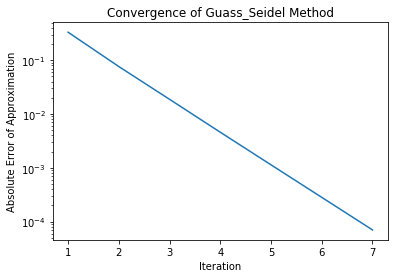

(array([[0.00180607],
        [0.00090064],
        [0.0006349 ],
        ...,
        [0.00160218],
        [0.00098918],
        [0.00224874]]), 7)

In [47]:
SOR_sparse(C, np.random.random(50000), plot = True)

### Problem 6

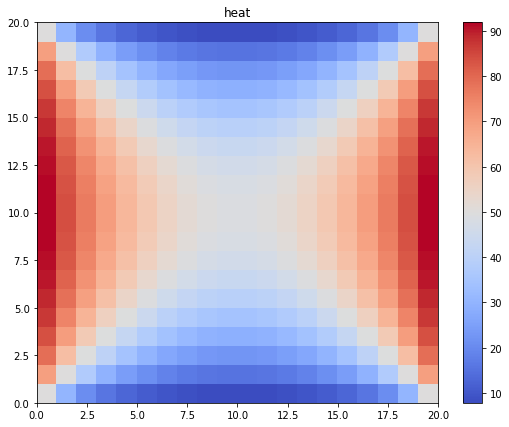

In [48]:
def heat_finite_difference(n, ω, tol = 1e-2, maxiter = 1000, plot = False):
    
    # B
    B = sp.sparse.diags([1, -4, 1], [-1, 0, 1], shape = (n, n))
    
    # A
    I = sp.sparse.diags([1], shape = (n, n)) # identity

    Amat = []
    for i in range(n):
        Arow = []
        for j in range(n):
            if j < i - 1:
                Arow.append(None)
            elif j == i - 1:
                Arow.append(I)
            elif j == i:
                Arow.append(B)
            elif j == i + 1:
                Arow.append(I)
            else:
                Arow.append(None)
        Amat.append(Arow)
        
    A = sp.sparse.bmat(Amat, format = 'csr')
    lilb = np.zeros(n)
    lilb[0] = -100
    lilb[-1] = -100
    b = np.tile(lilb, n)

    u, iterations = SOR_sparse(A, b, tol, ω, maxiter, plot = False)
    
    if plot:
        xx = np.linspace(0, n ,n+1)
        yy = np.linspace(0, n, n+1)
        X, Y = np.meshgrid(xx, yy)
        u_2d = u.reshape((n, n))
        plt.figure(figsize = (9,7))
        plt.pcolormesh(X, Y, u_2d, cmap = 'coolwarm')
        plt.title('heat')
        plt.colorbar()
        plt.show()
    
    return u, iterations

u, iterations = heat_finite_difference(20, 1, plot = True)

### Problem 7

0.01
0.060000000000000005
0.11
0.16000000000000003
0.21000000000000002
0.26
0.31000000000000005
0.36000000000000004
0.41000000000000003
0.46
0.51
0.56
0.6100000000000001
0.66
0.7100000000000001
0.76
0.81
0.8600000000000001
0.91
0.9600000000000001


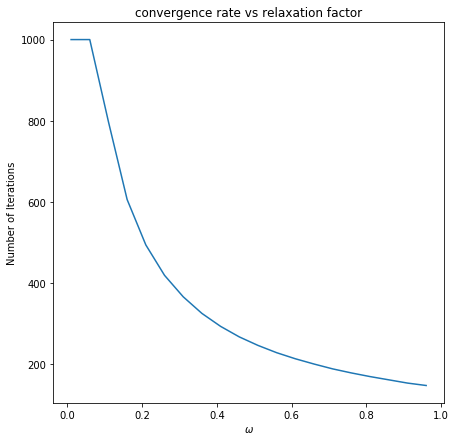

0.9600000000000001

In [49]:
def relaxation_compare(n):
    ωlist = np.arange(0.01, 1, 0.05)
    iterations = []
    for ω in ωlist:
        print(ω)
        u, iters = heat_finite_difference(n, ω, plot = False)
        iterations.append(iters)
    
    fig = plt.figure(figsize=(7, 7))
    plt.plot(ωlist, iterations)
    plt.xlabel('$\omega$')
    plt.ylabel('Number of Iterations')
    plt.title('convergence rate vs relaxation factor')
    plt.show()
    
    iterations = np.array(iterations)
    return ωlist[np.argmin(iterations)]

relaxation_compare(10)

- I do not know what happened but if I use $\omega$ larger than 1, the algorithm diverges, I dont think my code is wrong as everything else works fine.

# Newton and Quasi-Newton

### Problem 1

In [50]:
def Newton(df, d2f, x_guess, maxiter = 1000, tol = 1e-6):
    
    xk = x_guess.copy()
    xkp1 = np.zeros_like(x0)
    converge = False
    
    for i in range(maxiter):
        
        threshold = la.norm(df(xk), np.inf)
        
        if threshold < tol:
            converge = True
            break
        
        else:
            zk = la.solve(d2f(xk), df(xk))
            xk -= zk
    numiter = i+1
    
    return xk, converge, numiter

In [51]:
# Rosenbrock function
x0 = np.array([-2.,2.])
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess 

Newton(df,d2f,x0)

(array([1., 1.]), True, 6)

In [52]:
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


array([1.00000021, 1.00000045])

### Problem 2

In [53]:
def BFGS(df, x_guess, maxiter = 1000, tol = 1e-6):
    
    xk = x_guess.copy()
    xkp1 = np.zeros_like(x_guess)
    Akinv = np.eye(len(x_guess)) # matrix A
    sk = np.zeros_like(x_guess) # vector s
    converge = False
    
    for i in range(maxiter):
        
        # stopping condition
        diff = la.norm(df(xk), np.inf)
        if diff < tol:
            converge = True
            break
        
        else: # update
            # next x
            dfx = df(xk)
            xkp1 = xk - Akinv@dfx

            # s, y and A
            sk = xkp1 - xk
            yk = df(xkp1) - dfx
            skyk = sk@yk
            
            # terminate if skyk is 0
            if abs(skyk) < 1e-20:
                break
                
            Akp1inv = Akinv + (skyk + yk@Akinv@yk) * np.outer(sk, sk) / ((skyk)**2) \
            - (Akinv@np.outer(yk, sk) + np.outer(sk, yk)@Akinv) / skyk

            # update
            Akinv = Akp1inv.copy()
            xk = xkp1.copy()
            
    numiter = i+1
        
    return xk, converge, numiter

In [54]:
BFGS(df, x0)

(array([0.99999999, 0.99999998]), True, 150)

### Problem 3

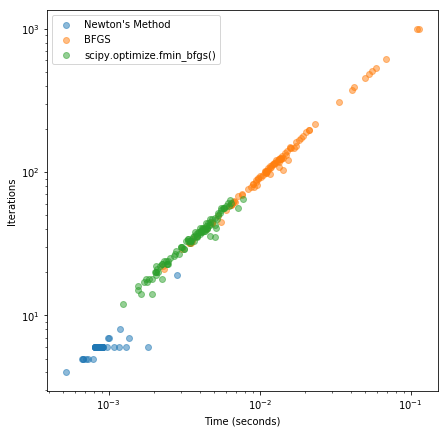

In [55]:
def compare_time(N):

    numiter_newton = np.zeros(N)
    time_newton = np.zeros(N)
    numiter_BFGS = np.zeros(N)
    time_BFGS = np.zeros(N)
    numiter_scipy = np.zeros(N)
    time_scipy = np.zeros(N)

    for i in range(N):
        # Sample a random initial guess
        x0 = np.random.uniform(-3,3,2)

        # Newton
        time_newton[i] = -time.time()
        numiter_newton[i] = Newton(df, d2f, x0, maxiter = 1000, tol = 1e-6)[2]
        time_newton[i] += time.time()

        # BFGS
        time_BFGS[i] = -time.time()
        numiter_BFGS[i] = BFGS(df, x0, maxiter = 1000, tol = 1e-6)[2]
        time_BFGS[i] += time.time()

        # SciPy
        time_scipy[i] = -time.time()
        numiter_scipy[i] = len(opt.fmin_bfgs(f, x0, df, disp=False, retall=True)[1])
        time_scipy[i] +=  time.time()


    fig = plt.figure(figsize=(7,7))
    plt.loglog()
    plt.scatter(time_newton, numiter_newton, alpha=0.5, label='Newton\'s Method')
    plt.scatter(time_BFGS, numiter_BFGS, alpha=0.5, label='BFGS')
    plt.scatter(time_scipy, numiter_scipy, alpha=0.5, label='scipy.optimize.fmin_bfgs()')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Iterations')
    plt.legend()
    plt.show()
    
compare_time(100)

### Problem 4

In [56]:
def Gauss_Newton(r, J, x_guess, maxiter = 1000, tol = 1e-6):

    converge = False
    x0 = x_guess.copy()
    
    for i in range(maxiter):
        rxk = r(x0)
        Jxk = J(x0)
        zk = la.solve(Jxk.T @ Jxk, Jxk.T @ rxk)
        
        x1 = x0 - zk
        diff = la.norm(x1 - x0, np.inf)
        if diff < tol:
            converge = True
            break
            
        x0 = x1.copy()
    
    iterations = i+1
    
    return x0, iterations, converge

In [57]:
# Generate random data for t = 0, 1, ..., 10.
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10) # Perturbed data.

# Define the model function and the residual (based on the data).
model = lambda x, t: x[0]*np.sin(x[1]*t) # phi(x,t)
residual = lambda x: model(x, T) - y # r(x) = phi(x,t) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))

x0 = np.array([2.5,.6])

In [58]:
x, conv, niters = Gauss_Newton(residual, jac, x0)

In [59]:
opt.leastsq(func = residual, x0 = np.array([2.5, 0.6]), Dfun = jac)

(array([2.51744243, 0.50917388]), 1)

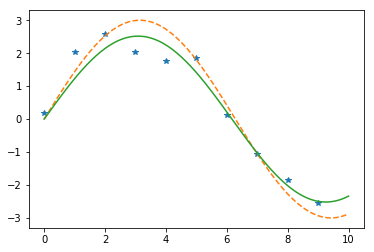

In [60]:
dom = np.linspace(0, 10, 200)
plt.plot(T, y, '*')
plt.plot(dom, 3*np.sin(.5*dom), '--')
plt.plot(dom, model(x, dom))
plt.show()

### Problem 5

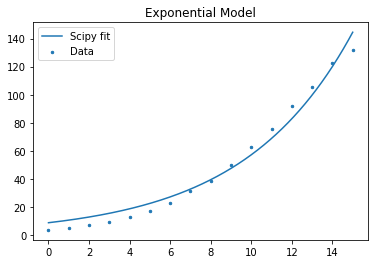

In [61]:
data = np.load('population.npy')
T = data[:,0]
y = data[:,1]

model = lambda x, t: x[0]*np.exp(x[1]*(t+x[2]))
residual = lambda x: model(x, T) - y
jac = lambda x: np.column_stack((np.exp(x[1] * (T + x[2])), 
                                 x[0] * (T + x[2]) * np.exp(x[1] * (T + x[2])),
                                 x[0] * x[1] * np.exp(x[1] * (T + x[2]))))


x0=np.array([1.5, 0.4, 2.5])

scipy_points = opt.leastsq(func=residual, x0 = x0, Dfun=jac)[0]
# my_points = Gauss_Newton(residual, jac, x0)[0]
TT = np.linspace(T.min(), T.max(), 1000)
scipy_fit = model(scipy_points, TT)
# my_fit = model(my_points, TT)

# plot the resulting curve along with the actual data points
plt.scatter(T, y, label='Data', s=6, marker='o')
# plt.plot(TT, my_fit, label='My fit')
plt.plot(TT, scipy_fit, label='Scipy fit')
plt.title("Exponential Model")
plt.legend()
plt.show()

- For the exponential model, my own function does not work as la.solve raises inf error

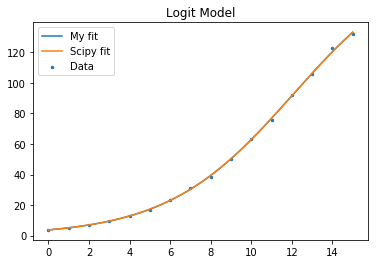

In [62]:
model = lambda x, t: x[0] / (1 + np.exp (-x[1] * (t + x[2])))
residual = lambda x: model(x, T) - y
jac = lambda x: np.column_stack\
((1 / (1 + np.exp (-x[1] * (T + x[2]))),
  x[0] * np.exp(-x[1] * (T + x[2])) * (T + x[2]) / (1 + np.exp(-x[1] * (T + x[2])))**2,
  x[0] * np.exp(-x[1] * (T+x[2])) * x[1] / (1 + np.exp(-x[1] * (T + x[2])))**2))

x0=np.array([150, 0.4, -15])

scipy_points = opt.leastsq(func=residual, x0 = x0, Dfun=jac)[0]
my_points = Gauss_Newton(residual, jac, x0)[0]
TT = np.linspace(T.min(), T.max(), 1000)
scipy_fit = model(scipy_points, TT)
my_fit = model(my_points, TT)

# plot the resulting curve along with the actual data points
plt.scatter(T, y, label='Data', s=6, marker='o')
plt.plot(TT, my_fit, label='My fit')
plt.plot(TT, scipy_fit, label='Scipy fit')
plt.title("Logit Model")
plt.legend()
plt.show()

- For the logit model, my own function also works